# 실습 3 

- url 링크를 통한 pandas 데이터 불러오기

In [ ]:
url = 'https://github.com/PinkWink/playing_data/raw/master/data/teenage_mental.xls'

In [ ]:
import pandas as pd
pd.read_excel(url)

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [ ]:
pd.read_excel(url, header=1)

,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


- 기간, 구분 제거

In [ ]:
pd.read_excel(url, header=1, usecols='C:K')

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


- 목차 직접 설정하기

In [ ]:
col_names = ['스트레스', '스트레스남학생', '스트레스여학생', '우울한경험률',
             '우울남학생', '우울여학생', '자살생각율', '자살남학생', '자살여학생']
raw_data = pd.read_excel(url, header=1, usecols='C:K', names=col_names)
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울한경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [ ]:
raw_data.loc[0]

스트레스       42.7
스트레스남학생    34.5
스트레스여학생    51.5
우울한경험률     29.6
우울남학생      24.2
우울여학생      35.4
자살생각율      15.4
자살남학생      11.8
자살여학생      19.2
Name: 0, dtype: float64

- 스트레스 받는 사람과 받지 않는 사람 확인

In [ ]:
raw_data.loc[0,'스트레스']

np.float64(42.7)

In [ ]:
raw_data.loc[1] = 100.0 - raw_data.loc[0]

In [ ]:
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울한경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [ ]:
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울한경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [ ]:
raw_data = raw_data.set_index('응답')
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울한경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


- 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

- y축 label이 자동으로 설정됨

<Axes: ylabel='스트레스'>

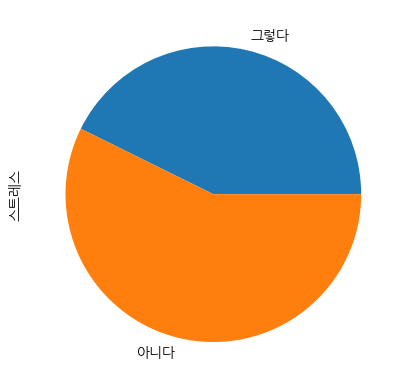

In [ ]:
raw_data['스트레스'].plot.pie()

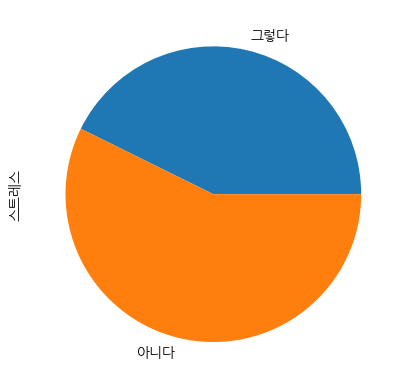

In [ ]:
plt.figure()
raw_data['스트레스'].plot.pie()
plt.show()

- ylabel 제거

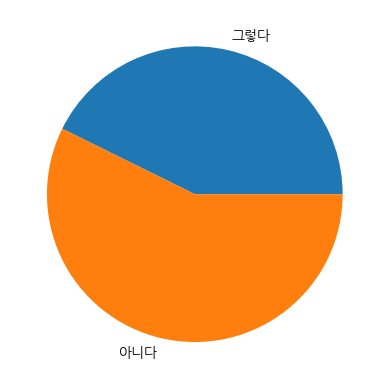

In [ ]:
plt.figure()
raw_data['스트레스'].plot.pie()
plt.ylabel('')
plt.show()

- title 설정

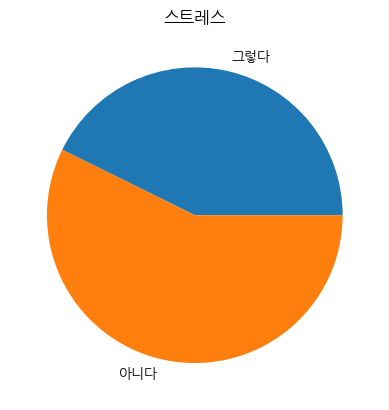

In [ ]:
plt.figure()
raw_data['스트레스'].plot.pie()
plt.ylabel('')
plt.title('스트레스')
plt.show()

- autopct 설정

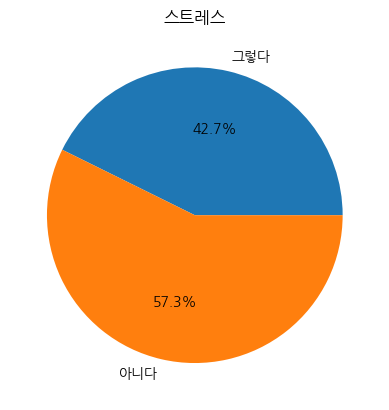

In [ ]:
plt.figure()
raw_data['스트레스'].plot.pie(autopct='%.1f%%')
plt.ylabel('')
plt.title('스트레스')
plt.show()

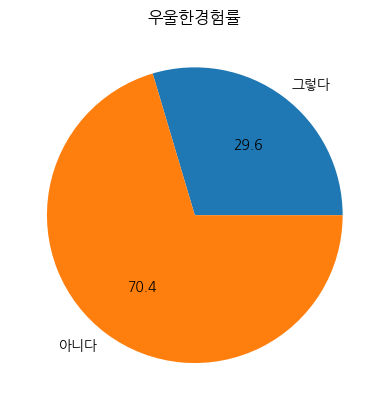

In [ ]:
plt.figure()
raw_data['우울한경험률'].plot.pie(autopct='%.1f')
plt.ylabel('')
plt.title('우울한경험률')
plt.show()

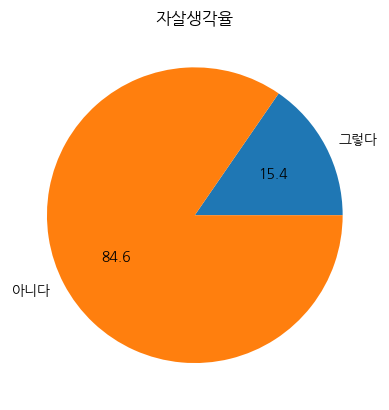

In [ ]:
plt.figure()
raw_data['자살생각율'].plot.pie(autopct='%.1f')
plt.ylabel('')
plt.title('자살생각율')
plt.show()

- 한눈에 보기

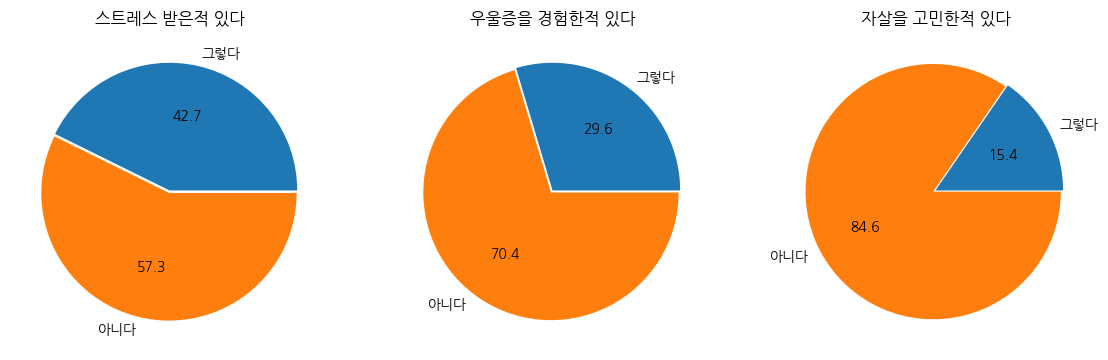

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(14,6))

raw_data['스트레스'].plot.pie(explode=[0, 0.02], ax=ax[0], autopct='%.1f')
ax[0].set_title('스트레스 받은적 있다')
ax[0].set_ylabel('')

raw_data['우울한경험률'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct='%.1f')
ax[1].set_title('우울증을 경험한적 있다')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0, 0.02], ax=ax[2], autopct='%.1f')
ax[2].set_title('자살을 고민한적 있다')
ax[2].set_ylabel('')

plt.show()